In [21]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

# 2.1 Read data

In [22]:
corpus = pd.read_pickle("s19_df_corpus.pkl")
dtm = pd.read_pickle("DTM_v1.pkl")

In [23]:
corpus

,episode,start_times,segment,lines
0,1,2022-09-25 00:00:00,intro,i still cannot believe that i am the bachelor...
1,1,2022-09-25 00:05:00,episode,i did not want you to leave but now you do ...
2,1,2022-09-25 00:10:00,episode,by going through what we did go through so i...
3,1,2022-09-25 00:15:00,episode,all right anxiety attack here we go wow yea...
4,1,2022-09-25 00:20:00,episode,nice clearly i am not good at juggling two w...
...,...,...,...,...
190,11,2022-09-25 01:15:00,episode,i am upset that i was not there i know that ...
191,11,2022-09-25 01:20:00,episode,i am truly sorry that is the first thing i w...
192,11,2022-09-25 01:25:00,episode,feelings how hard is it for you now these l...
193,11,2022-09-25 01:30:00,episode,you and that is scary for me to say i am su...


In [24]:
dtm

,aah,abc,abilities,ability,able,abs,absolute,absolutely,absurd,abundance,...,younger,youse,yum,yummy,zach,zachary,zero,zhh,zodiac,zone
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.2 Find the most common words for each episode

In [25]:
#going to make a second corpus in order to do this
#the first corpus is BY 5 MIN INTERVAL
#this corpus is by each of the 11 EPISODE
corpus["lines_by_episode"] = corpus.groupby(["episode"])["lines"].transform(lambda x: ' '.join(x))
corpus_by_ep = corpus.drop_duplicates().reset_index(drop=True)
corpus_by_ep = corpus_by_ep.drop(columns=['start_times', 'segment', 'lines'])
corpus_by_ep
#code to help me:
#https://www.roelpeters.be/how-to-concatenate-strings-from-multiple-rows-by-group-pandas/

,episode,lines_by_episode
0,1,i still cannot believe that i am the bachelor...
1,1,i still cannot believe that i am the bachelor...
2,1,i still cannot believe that i am the bachelor...
3,1,i still cannot believe that i am the bachelor...
4,1,i still cannot believe that i am the bachelor...
...,...,...
190,11,tonight the shocking drama begins live i d...
191,11,tonight the shocking drama begins live i d...
192,11,tonight the shocking drama begins live i d...
193,11,tonight the shocking drama begins live i d...


In [26]:
#only need to retain the text for the LAST
#entry of each episode because all the prior rows are just dups
corpus_by_ep = corpus_by_ep.groupby("episode").last()
corpus_by_ep
corpus_by_ep.to_pickle("corpus_by_ep.pkl")

In [27]:
corpus_by_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lines_by_episode  11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes


In [28]:
corpus_by_ep

,lines_by_episode
episode,
1,i still cannot believe that i am the bachelor...
2,tonight on the bachelorette bring it on thi...
3,tonight on the bachelorette ahh your smile ...
4,tonight on the bachelorette gabby and rachel...
5,tonight on the bachelorette we are going to ...
6,tonight on the bachelorette i do not know if...
7,tonight on the bachelorette oh my god i am ...
8,tonight on a very special episode of the bac...
9,previously on the bachelorette welcome to ne...


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

s19_text = list(corpus_by_ep.lines_by_episode)
s19_text

[' i still cannot believe that i am the bachelorette  rachel s the bachelorette  we get this amazing experience together  to truly find love  there is really no rule book for this  so we are just going with it  but i have absolutely no doubt  our future husbands are here  if you could kiss one of us which one would it be  both absolutely  good answer  i am having so much fun  getting to know the guys  so what do you think  yeah he is a piece of  oh  love is in the air  and i am so excited  to see where things go from here  i am so crazy about you  and i do not want a future without you  i am so happy right now  what is up gabby what is up rachel  what is up gabby what is up rachel  meatball will you accept this rose  i am sorry i cannot  i am here for gabby  meatball rejected my rose  like this is the most embarrassing thing in my life  no one s really ready to pick a lane and stay in it  having two bachelorettes has provided struggle  and i think it is all coming to a head  i do have 

In [30]:
#we make our NEW DTM
cv = CountVectorizer(stop_words='english') 
X = cv.fit_transform(s19_text)
dtm_ep = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
dtm_ep.index = corpus_by_ep.index
dtm_ep


,aah,abc,abilities,ability,able,abs,absolute,absolutely,absurd,abundance,...,younger,youse,yum,yummy,zach,zachary,zero,zhh,zodiac,zone
episode,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,9,0,2,19,0,1,...,0,0,0,0,2,0,1,2,0,0
2,0,0,0,2,14,2,0,16,0,0,...,3,0,0,0,1,0,4,0,0,1
3,1,0,0,0,10,0,0,15,0,0,...,0,0,0,1,19,1,0,0,0,3
4,0,0,1,0,6,0,0,16,0,0,...,0,0,0,0,6,0,0,0,0,1
5,0,0,0,0,8,0,0,8,0,0,...,1,0,1,0,6,0,0,0,1,1
6,0,0,0,0,8,1,2,11,0,1,...,0,0,0,0,19,0,1,0,0,1
7,0,0,0,0,9,0,0,7,0,0,...,0,0,0,0,11,0,0,0,0,1
8,0,1,0,1,12,0,0,11,2,0,...,0,1,0,0,0,0,2,0,0,0
9,0,0,0,0,16,0,2,10,0,0,...,0,0,0,0,3,0,0,0,0,1


In [31]:
#now we have a TERM document matrix
#easier to manipualte
dtm_ep = dtm_ep.transpose()
dtm_ep
#code to help me do all the below cells:
#https://github.com/adashofdata/nlp-in-python-tutorial

episode,1,2,3,4,5,6,7,8,9,10,11
aah,0,0,1,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,1,0,0,3
abilities,0,0,0,1,0,0,0,0,0,0,0
ability,0,2,0,0,0,0,0,1,0,0,0
able,9,14,10,6,8,8,9,12,16,9,8
...,...,...,...,...,...,...,...,...,...,...,...
zachary,0,0,1,0,0,0,0,0,0,0,0
zero,1,4,0,0,0,1,0,2,0,0,0
zhh,2,0,0,0,0,0,0,0,0,0,0
zodiac,0,0,0,0,1,0,0,0,0,0,0


In [32]:
#what are the top 20 words by episode?
top_dict = {}
for c in dtm_ep.columns:
    top = dtm_ep[c].sort_values(ascending=False).head(20)
    top_dict[c]=list(zip(top.index, top.values))
    
top_dict

{1: [('like', 218),
  ('yeah', 187),
  ('know', 171),
  ('going', 151),
  ('oh', 132),
  ('just', 100),
  ('really', 92),
  ('guys', 87),
  ('right', 82),
  ('gabby', 73),
  ('good', 69),
  ('think', 67),
  ('rachel', 65),
  ('okay', 57),
  ('feel', 57),
  ('want', 52),
  ('love', 50),
  ('time', 50),
  ('did', 42),
  ('little', 42)],
 2: [('like', 240),
  ('yeah', 147),
  ('know', 143),
  ('just', 119),
  ('going', 107),
  ('really', 91),
  ('think', 73),
  ('oh', 73),
  ('want', 64),
  ('guys', 64),
  ('feel', 64),
  ('did', 55),
  ('right', 52),
  ('gabby', 50),
  ('rose', 49),
  ('rachel', 49),
  ('time', 46),
  ('good', 45),
  ('okay', 44),
  ('little', 40)],
 3: [('like', 270),
  ('know', 138),
  ('yeah', 119),
  ('really', 107),
  ('just', 103),
  ('think', 94),
  ('oh', 83),
  ('rachel', 71),
  ('going', 69),
  ('rose', 66),
  ('feel', 65),
  ('want', 61),
  ('gabby', 60),
  ('right', 56),
  ('guys', 48),
  ('time', 47),
  ('love', 46),
  ('did', 46),
  ('tonight', 45),
  ('goo

In [33]:
for i, top_words in top_dict.items():
    print(i)
    print(', '.join([word for word, count in top_words[0:11]]))
    print("  ")

1
like, yeah, know, going, oh, just, really, guys, right, gabby, good
  
2
like, yeah, know, just, going, really, think, oh, want, guys, feel
  
3
like, know, yeah, really, just, think, oh, rachel, going, rose, feel
  
4
like, yeah, really, just, know, feel, oh, want, rachel, gabby, think
  
5
like, just, know, yeah, feel, want, going, really, gabby, think, oh
  
6
like, know, just, yeah, really, going, oh, think, want, feel, right
  
7
like, know, just, yeah, really, feel, love, going, think, family, right
  
8
like, just, know, yeah, think, did, going, right, oh, gabby, rachel
  
9
like, know, just, really, feel, yeah, love, going, want, think, week
  
10
like, know, just, think, yeah, really, want, love, good, right, time
  
11
like, know, just, want, really, going, yeah, think, rachel, feel, did
  


<B>NOTE</B>: need to remove LIKE...not a useful term.

In [34]:
#look at top 10 words from each episode
words = []
for c in dtm_ep.columns:
    top = [word for (word,count) in top_dict[c]]
    for t in top:
        words.append(t)
        
words

['like',
 'yeah',
 'know',
 'going',
 'oh',
 'just',
 'really',
 'guys',
 'right',
 'gabby',
 'good',
 'think',
 'rachel',
 'okay',
 'feel',
 'want',
 'love',
 'time',
 'did',
 'little',
 'like',
 'yeah',
 'know',
 'just',
 'going',
 'really',
 'think',
 'oh',
 'want',
 'guys',
 'feel',
 'did',
 'right',
 'gabby',
 'rose',
 'rachel',
 'time',
 'good',
 'okay',
 'little',
 'like',
 'know',
 'yeah',
 'really',
 'just',
 'think',
 'oh',
 'rachel',
 'going',
 'rose',
 'feel',
 'want',
 'gabby',
 'right',
 'guys',
 'time',
 'love',
 'did',
 'tonight',
 'good',
 'like',
 'yeah',
 'really',
 'just',
 'know',
 'feel',
 'oh',
 'want',
 'rachel',
 'gabby',
 'think',
 'did',
 'going',
 'rose',
 'guys',
 'good',
 'love',
 'kind',
 'right',
 'okay',
 'like',
 'just',
 'know',
 'yeah',
 'feel',
 'want',
 'going',
 'really',
 'gabby',
 'think',
 'oh',
 'guys',
 'logan',
 'good',
 'rose',
 'time',
 'rachel',
 'did',
 'kind',
 'tonight',
 'like',
 'know',
 'just',
 'yeah',
 'really',
 'going',
 'oh',
 

In [35]:
from collections import Counter
Counter(words).most_common()
#we can see how often each of these top words are contained
#in our 11 documents

[('like', 11),
 ('yeah', 11),
 ('know', 11),
 ('going', 11),
 ('just', 11),
 ('really', 11),
 ('think', 11),
 ('feel', 11),
 ('want', 11),
 ('oh', 10),
 ('right', 10),
 ('good', 9),
 ('rachel', 9),
 ('love', 9),
 ('time', 9),
 ('did', 9),
 ('guys', 7),
 ('gabby', 7),
 ('okay', 7),
 ('rose', 5),
 ('kind', 4),
 ('tonight', 3),
 ('little', 2),
 ('today', 2),
 ('family', 2),
 ('mean', 2),
 ('excited', 2),
 ('ready', 2),
 ('logan', 1),
 ('meet', 1),
 ('men', 1),
 ('meatball', 1),
 ('thank', 1),
 ('say', 1),
 ('week', 1),
 ('falling', 1),
 ('um', 1),
 ('aven', 1),
 ('way', 1)]

In [36]:
#if more than 80% of the docs have it has a top word, 
#let's add it to the stop word list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 9]
add_stop_words

['like',
 'yeah',
 'know',
 'going',
 'just',
 'really',
 'think',
 'feel',
 'want',
 'oh',
 'right']

In [37]:
#let's make a new dtm without these stop words now
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#adding new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#creating new DTM
cv_r = CountVectorizer(stop_words=stop_words) 
X_r = cv_r.fit_transform(s19_text)
dtm_ep_r = pd.DataFrame(X_r.toarray(), columns=cv_r.get_feature_names())
dtm_ep_r.index = corpus_by_ep.index
dtm_ep_r

dtm_ep_r.to_pickle("DTM_v2.pkl")
#DTM_V2 is a DTM where each document/row is AN EPISODE
#DTM_V1 is a DTM where each document/row is a 5 min segment across ALL the episodes!

dtm_ep_r

,aah,abc,abilities,ability,able,abs,absolute,absolutely,absurd,abundance,...,younger,youse,yum,yummy,zach,zachary,zero,zhh,zodiac,zone
episode,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,9,0,2,19,0,1,...,0,0,0,0,2,0,1,2,0,0
2,0,0,0,2,14,2,0,16,0,0,...,3,0,0,0,1,0,4,0,0,1
3,1,0,0,0,10,0,0,15,0,0,...,0,0,0,1,19,1,0,0,0,3
4,0,0,1,0,6,0,0,16,0,0,...,0,0,0,0,6,0,0,0,0,1
5,0,0,0,0,8,0,0,8,0,0,...,1,0,1,0,6,0,0,0,1,1
6,0,0,0,0,8,1,2,11,0,1,...,0,0,0,0,19,0,1,0,0,1
7,0,0,0,0,9,0,0,7,0,0,...,0,0,0,0,11,0,0,0,0,1
8,0,1,0,1,12,0,0,11,2,0,...,0,1,0,0,0,0,2,0,0,0
9,0,0,0,0,16,0,2,10,0,0,...,0,0,0,0,3,0,0,0,0,1


In [38]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white",
              colormap="Dark2", max_font_size=100, random_state=42)



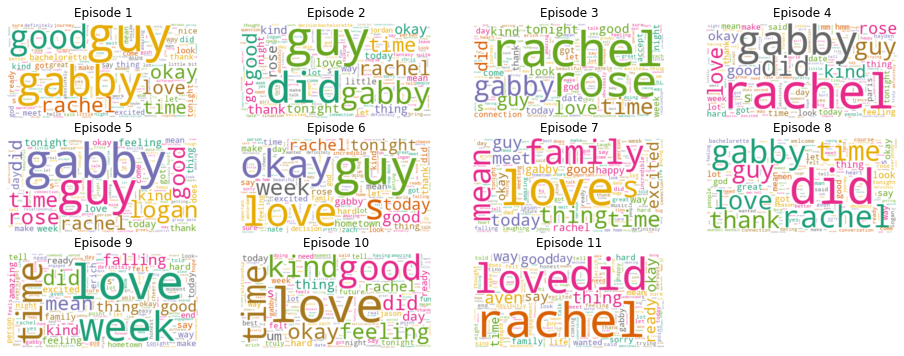

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

episodes = ['1', '2', '3', '4', '5', '6', '7',
           '8', '9', '10', '11']

for index, episode in enumerate(dtm_ep.columns):
    wc.generate(s19_text[index])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('Episode ' + episodes[index])
    
plt.show()

# 2.3 How often does "love" get said as the season progresses?

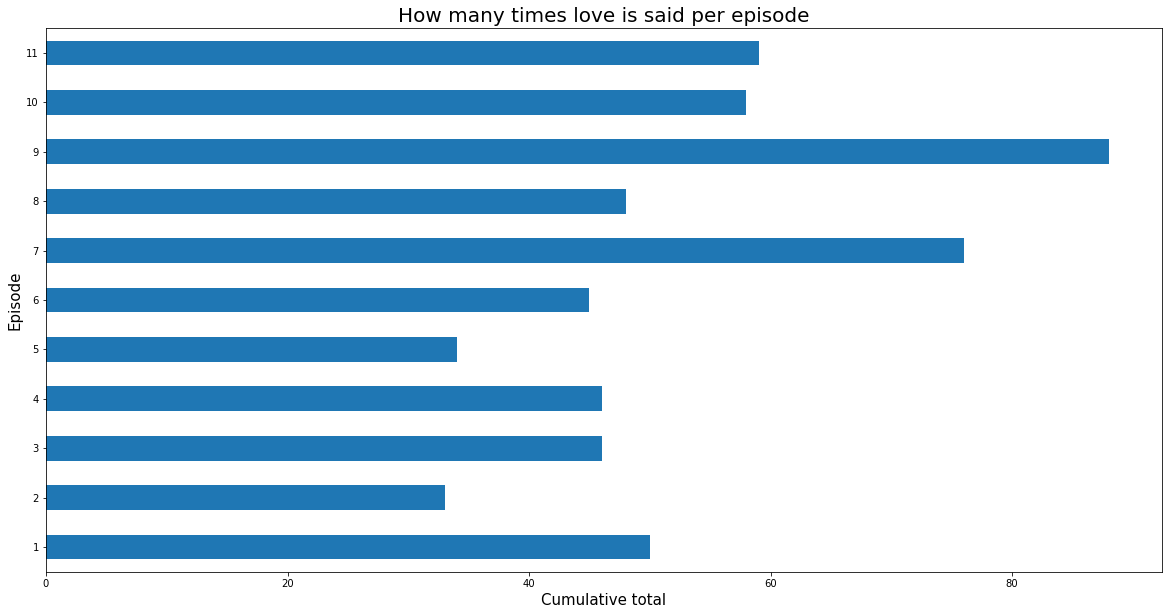

In [40]:
love_words = dtm_ep.transpose()['love']
love_words.plot(kind="barh", figsize=(20,10))

plt.title('How many times love is said per episode', fontsize=20)
plt.xlabel('Cumulative total', fontsize=15)
plt.ylabel('Episode', fontsize=15)

plt.show()